In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel("customer_churn_large_dataset.xlsx",sheet_name='Sheet1')

In [ ]:
!pip install openpyxl

In [10]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [11]:
df.shape

(100000, 9)

In [12]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [14]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [15]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [17]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


<Axes: >

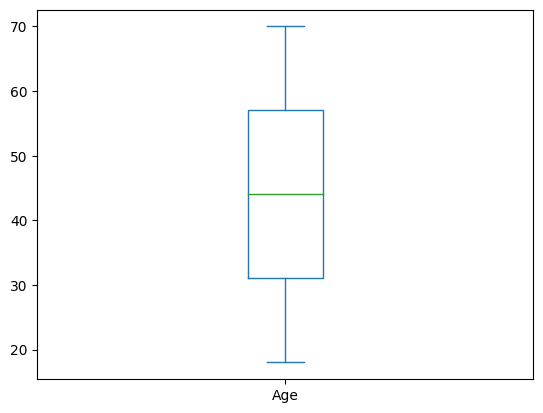

In [19]:
df['Age'].plot.box()

<Axes: >

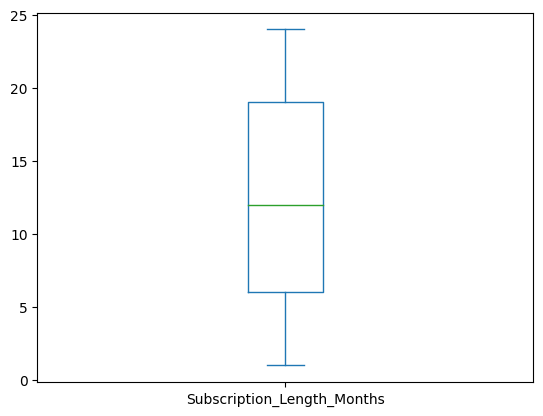

In [21]:
df['Subscription_Length_Months'].plot.box()

<Axes: >

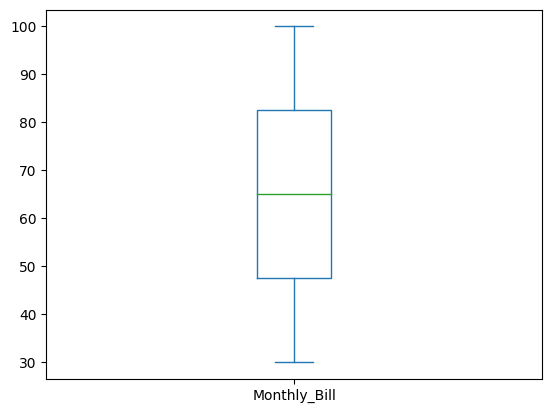

In [22]:
df['Monthly_Bill'].plot.box()

In [23]:
import seaborn as sns

<Axes: >

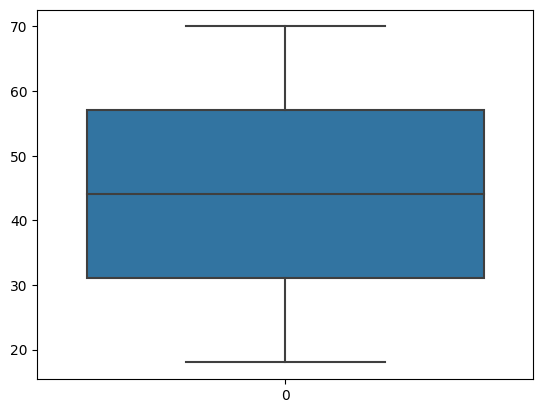

In [24]:
sns.boxplot(df["Age"])

<Axes: >

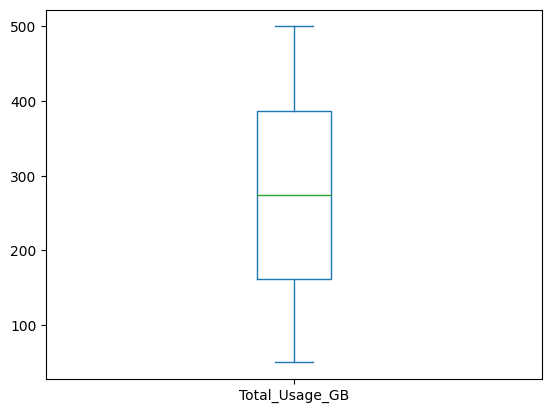

In [25]:
df["Total_Usage_GB"].plot.box()

In [26]:
df["Location"].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

<Axes: xlabel='Location'>

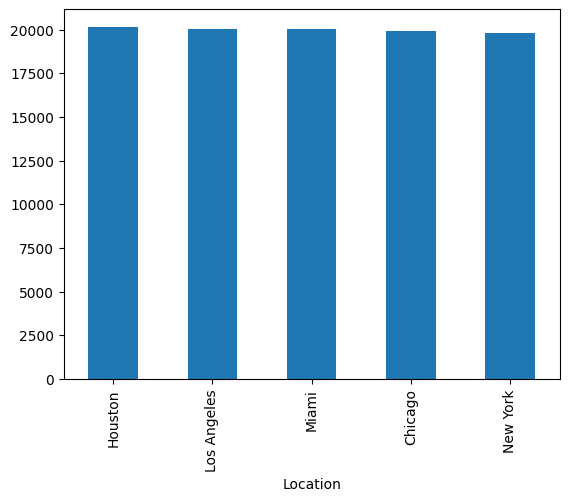

In [27]:
(df["Location"].value_counts()).plot.bar()

<Axes: xlabel='Gender'>

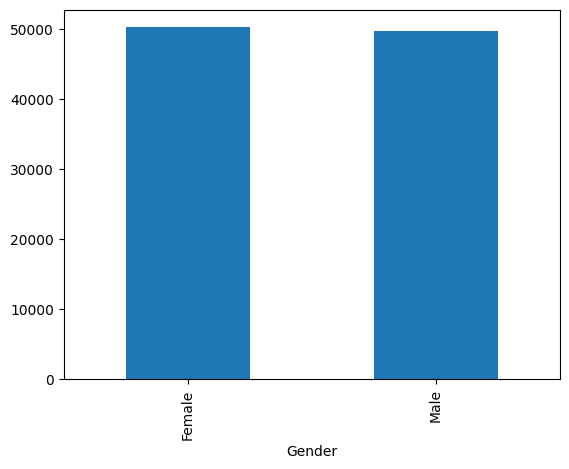

In [28]:
(df["Gender"].value_counts()).plot.bar()

<Axes: xlabel='Total_Usage_GB', ylabel='Churn'>

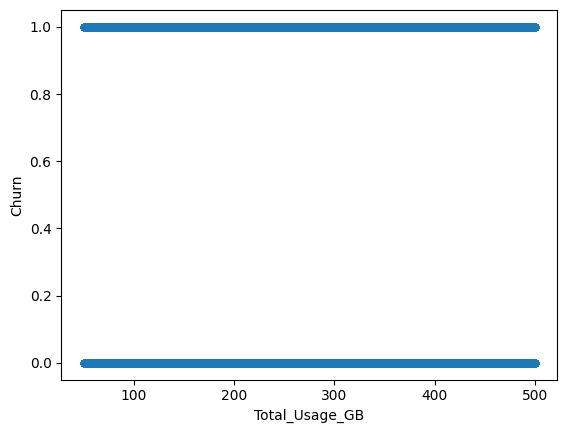

In [34]:
df.plot.scatter('Total_Usage_GB','Churn')

In [30]:
df = df.drop(['CustomerID','Name'],axis=1)

In [31]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


<Axes: xlabel='Location,Churn'>

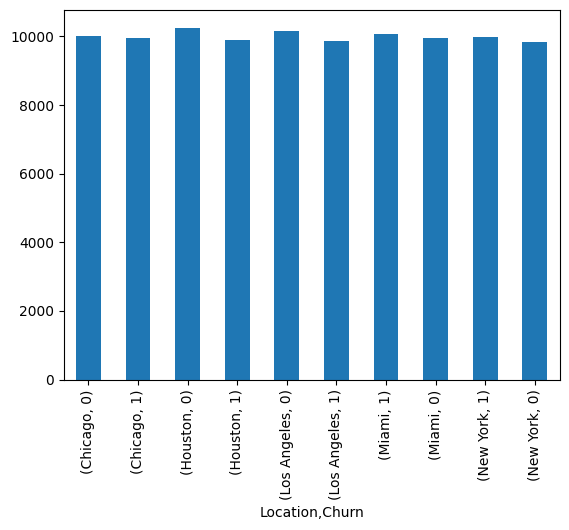

In [36]:
(df.groupby('Location')['Churn'].value_counts()).plot.bar()

<Axes: xlabel='Churn,Subscription_Length_Months'>

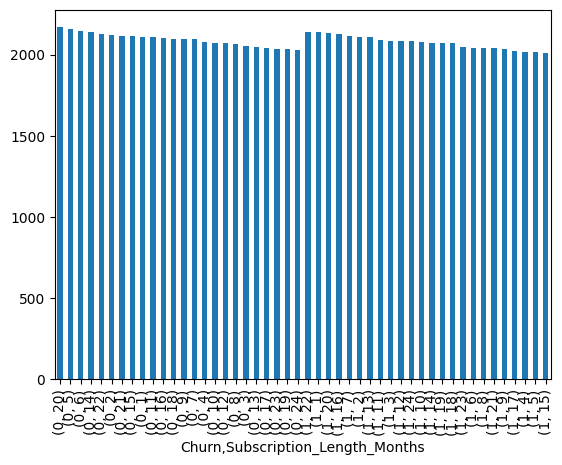

In [38]:
(df.groupby('Churn')['Subscription_Length_Months'].value_counts()).plot.bar()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [41]:
df = pd.get_dummies(df)

In [42]:
df.shape

(100000, 12)

In [43]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,False,True,False,False,True,False,False
1,62,1,48.76,172,0,True,False,False,False,False,False,True
2,24,5,85.47,460,0,True,False,False,False,True,False,False
3,36,3,97.94,297,1,True,False,False,False,False,True,False
4,46,19,58.14,266,0,True,False,False,False,False,True,False


In [44]:
def booltoint(value):
    return int(value)
df.iloc[:,5:12] = df.iloc[:,5:12].applymap(booltoint)

In [45]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0


In [108]:
X_train_scaled.shape

y_train.shape

(80000,)

In [104]:
X_train.shape

(80000, 11)

In [46]:
X = df.drop(columns = ['Churn'],axis=1)
Y = df['Churn']

In [ ]:
X.head()

In [48]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
X_train.size

660000

In [56]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_predict = model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test,y_predict) 
accuracy

0.49565

In [62]:
y_predict[34]

0

In [67]:
report = classification_report(y_test,y_predict)
report

'              precision    recall  f1-score   support\n\n           0       0.50      0.52      0.51     10079\n           1       0.49      0.47      0.48      9921\n\n    accuracy                           0.50     20000\n   macro avg       0.50      0.50      0.50     20000\nweighted avg       0.50      0.50      0.50     20000\n'

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[5246, 4833],
       [5254, 4667]], dtype=int64)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred = model.predict(X_test)

In [73]:
print(accuracy_score(y_test,y_pred))

0.50355


In [74]:
from sklearn.linear_model import RidgeClassifier

In [114]:
model1 = RidgeClassifier(alpha=1.0,random_state=42)

In [115]:
model1.fit(X_train,y_train)

RidgeClassifier(random_state=42)

In [116]:
y_pred = model1.predict(X_test)

In [117]:
print(accuracy_score(y_test,y_pred))

0.50335


In [79]:
# ann model
import tensorflow as tf

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6949 - accuracy: 0.5019 - val_loss: 0.6943 - val_accuracy: 0.5036
Epoch 2/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6936 - accuracy: 0.5047 - val_loss: 0.6937 - val_accuracy: 0.4975
Epoch 3/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5077 - val_loss: 0.6933 - val_accuracy: 0.5023
Epoch 4/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6938 - val_accuracy: 0.4981
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6930 - accuracy: 0.5070 - val_loss: 0.6935 - val_accuracy: 0.4974
Epoch 6/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6930 - accuracy: 0.5077 - val_loss: 0.6935 - val_accuracy: 0.4973
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6928 - accuracy: 0.5117 - val_loss: 0.6942 - val_accuracy:

In [83]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) 
print(accuracy_score(y_test, y_pred))

625/625 [==============================] - 1s 2ms/step
0.5014


In [84]:
df.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Female', 'Gender_Male', 'Location_Chicago',
       'Location_Houston', 'Location_Los Angeles', 'Location_Miami',
       'Location_New York'],
      dtype='object')

In [90]:
!pip install flask

     ---------------------------------------- 0.0/96.1 kB ? eta -:--:--
     ------------ --------------------------- 30.7/96.1 kB ? eta -:--:--
     ---------------- --------------------- 41.0/96.1 kB 667.8 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.1 kB 667.8 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.1 kB 667.8 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.1 kB 667.8 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.1 kB 667.8 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.1 kB 667.8 kB/s eta 0:00:01
     -------------------------------------- 96.1/96.1 kB 239.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/242.2 kB ? eta -:--:--
     ---------- ----------------------------- 61.4/242.2 kB ? eta -:--:--
     ----------------- -------------------- 112.6/242.2 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 174.1/242.2 kB 1.3 MB/s 